In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import InputLayer,TimeDistributed,LSTM,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Parameters
img_size = 100  # Size to which images will be resized
dataset_path = r"C:\Users\aniru\Downloads\brain mri\Training"
test_dataset_path = r"C:\Users\aniru\Downloads\brain mri\Testing"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
# Function to load training data
def load_data(dataset_path):
    data = []
    for category in categories:
        path = os.path.join(dataset_path, category)
        class_label = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                data.append([resized_img, class_label])
            except Exception as e:
                pass
    return data

# Load training data
data = load_data(dataset_path)
np.random.shuffle(data)  # Shuffle the dataset


In [6]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
y = to_categorical(np.array(y), len(categories))  # One-hot encoding

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(categories), activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)



C:\Users\aniru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.6276 - loss: 0.8532 - val_accuracy: 0.8591 - val_loss: 0.3824
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8591 - loss: 0.3613 - val_accuracy: 0.8854 - val_loss: 0.3063
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9129 - loss: 0.2276 - val_accuracy: 0.8828 - val_loss: 0.3046
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9522 - loss: 0.1296 - val_accuracy: 0.9011 - val_loss: 0.2755
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.9820 - loss: 0.0638 - val_accuracy: 0.9353 - val_loss: 0.2072
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9895 - loss: 0.0387 - val_accuracy: 0.9265 - val_loss: 0.2362
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9920 - loss: 0.0305 - val_accuracy: 0.9256 - val_loss: 0.2547
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9972 - loss: 0.0149 - 

In [8]:
# Save the model after training
model.save('tumor_detection_model.h5')
print("Model saved as 'tumor_detection_model.h5'.")

Model saved as 'tumor_detection_model.h5'.


In [9]:
# Load test data
def load_test_data(test_dataset_path):
    test_data = []
    for category in categories:
        path = os.path.join(test_dataset_path, category)
        class_label = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                test_data.append([resized_img, class_label])
            except Exception as e:
                pass
    return test_data

# Load test data
test_data = load_test_data(test_dataset_path)



In [10]:
# Prepare test data
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
y_test = to_categorical(np.array(y_test), len(categories))  # One-hot encoding

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")




41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9304 - loss: 0.2584
Test accuracy: 93.82%


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


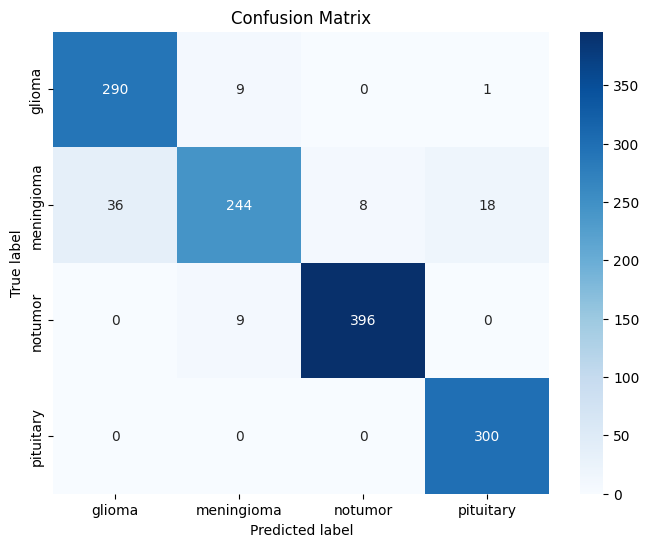

In [11]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

CNN+LSTM architecture 

In [ ]:
# Parameters
img_size = 100  # Size to which images will be resized
dataset_path = r"C:\Users\aniru\Downloads\brain mri\Training"
test_dataset_path = r"C:\Users\aniru\Downloads\brain mri\Testing"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
sequence_length = 10

# Function to load the dataset
def load_data(data_dir, img_size, sequence_length, categories):
    X, y = [], []
    
    for class_index, class_name in enumerate(categories):
        class_folder = os.path.join(data_dir, class_name)
        image_files = sorted([f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.tif'))])
        
        for i in range(0, len(image_files) - sequence_length + 1, sequence_length):
            sequence = []
            for j in range(i, i + sequence_length):
                img_path = os.path.join(class_folder, image_files[j])
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0  # Normalize
                sequence.append(img)
            X.append(sequence)
            y.append(class_index)
    
    X = np.array(X)
    y = np.array(y)
    y = to_categorical(y, num_classes=len(categories))  # One-hot encode the labels
    return X, y

# Load training and testing data
X_train, y_train = load_data(dataset_path, img_size, sequence_length, categories)
X_test, y_test = load_data(test_dataset_path, img_size, sequence_length, categories)

# Model definition (CNN + LSTM)
model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(sequence_length, img_size, img_size, 3)))

# CNN layers applied over time steps (using TimeDistributed)
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

# Flatten each time step output
model.add(TimeDistributed(Flatten()))

# LSTM layer
model.add(LSTM(128, return_sequences=False, activation='tanh'))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=16)

# Evaluate the model
model.evaluate(X_test, y_test)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_63             │ (None, 10, 100, 100,   │           896 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_64             │ (None, 10, 50, 50, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_65             │ (None, 10, 50, 50, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_66             │ (None, 10, 25, 25, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_67             │ (None, 10, 25, 25,     │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_68             │ (None, 10, 12, 12,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_69             │ (None, 10, 18432)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │     9,503,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,604,996 (36.64 MB)

 Trainable params: 9,604,996 (36.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4271 - loss: 1.1963 - val_accuracy: 0.3684 - val_loss: 1.1887
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6569 - loss: 0.6836 - val_accuracy: 0.3333 - val_loss: 2.1561
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7357 - loss: 0.5695 - val_accuracy: 0.3684 - val_loss: 2.0669
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7959 - loss: 0.5323 - val_accuracy: 0.2368 - val_loss: 2.4916
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8781 - loss: 0.3549 - val_accuracy: 0.5614 - val_loss: 1.8794
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9221 - loss: 0.2730 - val_accuracy: 0.1667 - val_loss: 3.5635
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9106 - loss: 0.2544 - val_accuracy: 0.5789 - val_loss: 1.6949
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9193 - loss: 0.2337 - val_accuracy: 0.4035 - val_loss:

In [43]:
# Evaluate the CNN + LSTM model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.9082 - loss: 0.4373
Test Accuracy: 86.92%


Ploting and Evaluvating the CNN+LSTM ARCH

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9082 - loss: 0.4373
Test Accuracy: 86.92%


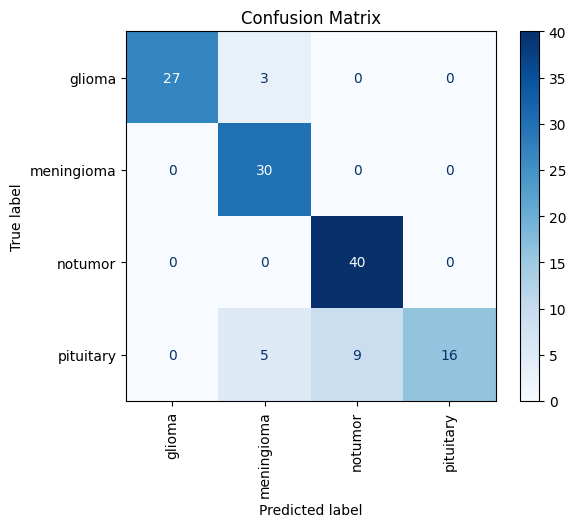

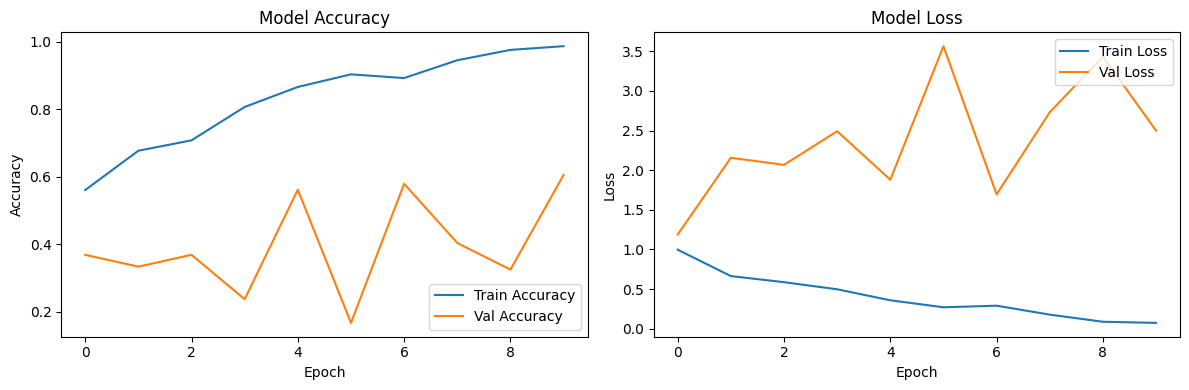

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred_classes, categories):
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.show()

# Plot training accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_classes, categories)

# Plot training history
plot_training_history(history)


U-Net model 

In [22]:
import numpy as np
import os
import cv2 as cv
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define dataset paths and categories
img_size = 128  # Adjust to fit your use case
dataset_path = r"C:\Users\aniru\Downloads\brain mri\Training"
test_dataset_path = r"C:\Users\aniru\Downloads\brain mri\Testing"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Function to load and preprocess the dataset
def load_data(dataset_path, categories, img_size):
    data = []
    labels = []
    
    for category in categories:
        path = os.path.join(dataset_path, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                resized_img = cv.resize(img_array, (img_size, img_size))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    
    data = np.array(data).reshape(-1, img_size, img_size, 1)  # Grayscale images
    labels = to_categorical(np.array(labels), num_classes=len(categories))
    
    return data / 255.0, labels  # Normalize

# Load and preprocess data
X_train, y_train = load_data(dataset_path, categories, img_size)
X_test, y_test = load_data(test_dataset_path, categories, img_size)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# U-Net Model Definition
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    # Downsample (Encoder)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Upsample (Decoder)
    up1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3)
    up1 = concatenate([up1, conv2])
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4)
    up2 = concatenate([up2, conv1])
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up2)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Flatten the output for classification
    flatten = Flatten()(conv5)
    dense = Dense(128, activation='relu')(flatten)
    output = Dense(len(categories), activation='softmax')(dense)

    model = Model(inputs=[inputs], outputs=[output])
    return model

# Build the U-Net model for classification
model = unet_model()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_5[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 64, 64,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_11… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_13[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 32, 32,    │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_12… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_15[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 64, 64,    │    131,200 │ conv2d_16[0][0]   │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 64,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_17[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 128, 128,  │     32,832 │ conv2d_18[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │     73,792 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_19[0][0] 

 Total params: 136,080,004 (519.10 MB)

 Trainable params: 136,080,004 (519.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 731s 3s/step - accuracy: 0.5480 - loss: 1.3440 - val_accuracy: 0.7550 - val_loss: 0.6838
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 760s 3s/step - accuracy: 0.8187 - loss: 0.4863 - val_accuracy: 0.8303 - val_loss: 0.4622
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 734s 3s/step - accuracy: 0.8838 - loss: 0.3005 - val_accuracy: 0.8688 - val_loss: 0.3417
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 732s 3s/step - accuracy: 0.9187 - loss: 0.2186 - val_accuracy: 0.8915 - val_loss: 0.3012
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.9678 - loss: 0.0893 - val_accuracy: 0.8819 - val_loss: 0.3870
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.9887 - loss: 0.0409 - val_accuracy: 0.8959 - val_loss: 0.4772
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.9864 - loss: 0.0370 - val_accuracy: 0.8880 - val_loss: 0.5323
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 715s 3s/step - accuracy: 0.9881 - loss: 0.0339 - val_accu

41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step


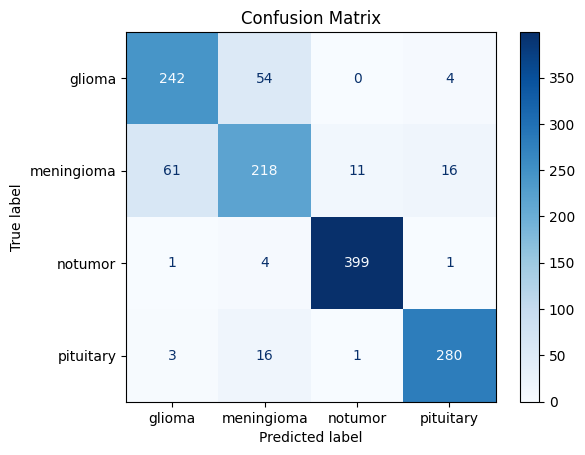

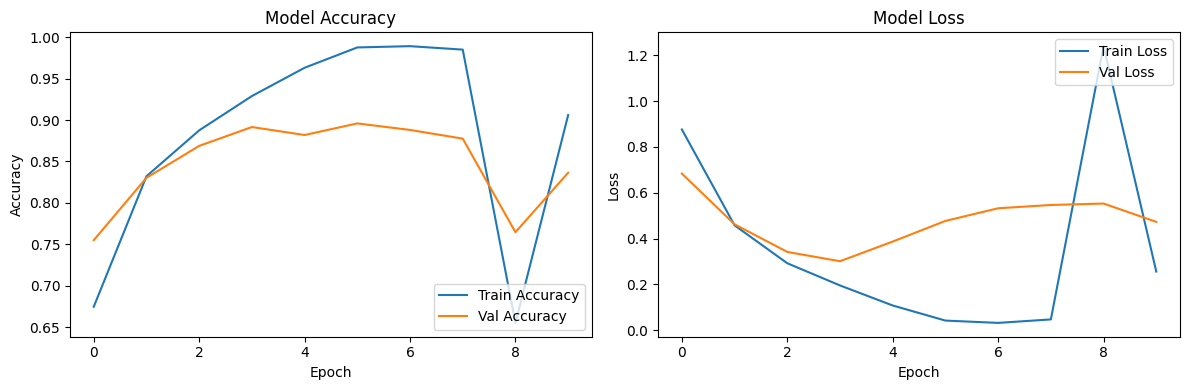

41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8281 - loss: 0.5195
Test Accuracy: 86.88%


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, categories):
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# Plot training accuracy and loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, categories)

# Plot training accuracy and loss
plot_training_history(history)

# Evaluate the model on the test data again for completeness
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the directory containing the images
image_dir = "/path/to/your/images"  # replace with your directory path
categories = ["no_tumor", "glioma_tumor", "meningioma_tumor", "pituitary_tumor"]

# Set up the figure for displaying images in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.suptitle("Brain MRI Tumor Classification", fontsize=16)

# Iterate over each category and each subplot position
for i, category in enumerate(categories):
    # Get all image files in the category directory
    category_path = os.path.join(image_dir, category)
    image_files = os.listdir(category_path)[:4]  # limit to 4 images per category for the grid
    
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(category_path, image_file)
        img = Image.open(image_path)
        
        # Display the image on the subplot
        ax = axes[i, j]
        ax.imshow(img, cmap="gray")
        ax.axis("off")
        if j == 0:  # Add category labels to the first image in each row
            ax.set_ylabel(category, rotation=90, size='large')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()
